In [1]:
%load_ext autoreload
%autoreload 2

### Materials:

https://medium.com/nuances-of-programming/%D0%B1%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B8%D0%BD%D1%82%D1%83%D0%B8%D1%86%D0%B8%D1%8F-%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B-%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4-4662b929305e

https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html

https://nbviewer.jupyter.org/github/alexeygrigorev/mlcourse_open/blob/master/jupyter_notebooks/tutorials/multi-armed_bandits/mab.ipynb


https://dataorigami.net/blogs/napkin-folding/79031811-multi-armed-bandits

### Байесовский Бандит (или "Bayesian Bernoulli Bandit") 

...Теперь перейдем к самому бандиту. Итак, каждая рука у нас - это $\theta_i$ , с приором $Beta(\alpha_i, \beta_i)$, где:

- $\alpha_i$ - это количество успешных исходов на текущий момент (+1),
- $\beta_i$ - количество неуспешных (тоже +1).

Теперь алгоритм такой:

1. для каждой руки делаем выборку из $\theta_i \sim Beta(\alpha_i, \beta_i)$
2. выбираем руку, для которой значение семпла наибольшее, дёргаем именно за эту руку 
3. наблюдаем результат, обновляем параметры для выбранной руки в зависимости от исхода 
4. повторяем пока не надоест

Этот алгоритм называется **Thompson Sampling**.

In [113]:
from scipy.stats import beta
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [114]:
class Arm:
    def __init__(self):
        self.alpha = 1
        self.beta = 1
    
    def sample(self):
        return beta.rvs(self.alpha, self.beta)
        
    def update(self, outcome):
        self.alpha = self.alpha + outcome
        self.beta = self.beta + (1-outcome)
        
class Bandit:
    def __init__(self, n):
        self.arms = [Arm() for i in range(n)]
        
    def select_arm(self):
        # сэмплируем вероятность выйграть для каждой руки(вероятность вероятности)
        sampled_arm_chances = [arm.sample() for arm in self.arms]
        # выбираем руки с наибольшей сэмплированной вероятностью
        best_cur_step_arm_idx = np.argmax(sampled_arm_chances)
        return best_cur_step_arm_idx, self.arms[best_cur_step_arm_idx]
    

In [115]:
!rm animation/*

In [116]:
!mkdir animation

mkdir: cannot create directory ‘animation’: File exists


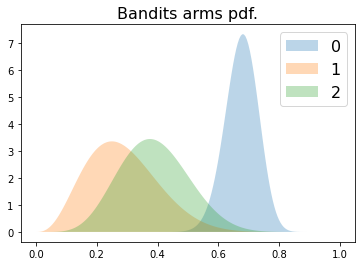

<Figure size 432x288 with 0 Axes>

In [118]:
def bernoulli_sampler(alpha):
    def sampler():
        return np.random.binomial(1, alpha)
    return sampler

def plot_arms_probs(arms):
    x = np.linspace(0, 1, 200)
    for i, arm in enumerate(arms):
        pdf = beta.pdf(x, arm.alpha, arm.beta)
        plt.fill_between(x, pdf, alpha=0.3, label=f'{i}')
    plt.title('Bandits arms pdf.', fontsize=16)
    plt.legend(fontsize=16)
    plt.show()
    
    
    
probs = [0.6, 0.2, 0.3]
outcomes_samplers = [bernoulli_sampler(p) for p in probs]

bandit = Bandit(n=len(probs))

N = 100
for i in range(N):
    arm_idx, arm = bandit.select_arm()
    outcome = outcomes_samplers[arm_idx]()
    arm.update(outcome)    
    plot_arms_probs(bandit.arms)
    plt.savefig('animation/iteration_%03d.png' % i)
    plt.show()
    display.clear_output(wait=True)

In [ ]:
# thompson_sampling

for i in range(n):
    def 
    